In [55]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib

matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from flipper_training.experiments.ppo.eval import get_eval_rollout, log_from_eval_rollout, PPOExperimentConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
eval_cfg = "../cross_eval_configs/trunk_hard.yaml"
# eval_cfg = "../final_training_configs/barrier.yaml"
figs = Path("/Users/davidkorcak/Documents/ctu/bachelors/bachelor_thesis/figures")

In [57]:
policy_path = "../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth"

In [58]:
eval_config = OmegaConf.load(eval_cfg)
eval_config["seed"] = 33434
eval_config["num_robots"] = 16
eval_config["objective_opts"]["cache_size"] = 10
eval_config["max_eval_steps"] = 1000
eval_config["policy_weights_path"] = Path(policy_path)
eval_config["vecnorm_weights_path"] = Path(policy_path.replace("policy", "vecnorm"))
eval_config = PPOExperimentConfig(**eval_config)

In [59]:
env, rollout = get_eval_rollout(eval_config)

2025-05-21 11:45:32,510 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-21 11:45:32,510 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-21 11:45:32,510 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-21 11:45:32,510 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_ca

                      Environment Summary                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Key ┃                                  Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    Number of robots │                                     16 │
│        Observations │            LocalStateVector, Heightmap │
│              Reward │ PotentialGoalWithPenaltiesConfigurable │
│           Objective │                          TrunkCrossing │
│   Physics frequency │                              142.86 Hz │
│   Engine iters/step │                                      4 │
│ Effective frequency │                               35.71 Hz │
└─────────────────────┴────────────────────────────────────────┘

2025-05-21 11:45:37,880 [torchrl][INFO] check_env_specs succeeded!
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,901 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-21 11:45:37,910 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_666_2

     Policy Parameter Counts     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃        Component ┃ Parameters ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    Actor Encoder │     32,032 │
│       Actor Head │     13,456 │
│    Value Encoder │     32,032 │
│       Value Head │     12,737 │
│              --- │        --- │
│      Total Actor │     45,488 │
│      Total Value │     44,769 │
│              --- │        --- │
│ Total Parameters │     90,257 │
└──────────────────┴────────────┘

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/envs/transforms/transforms.py:6500: UserWarning: VecNorm wasn't initialized and the tensordict is not shared. In single process settings, this is ok, but if you need to share the statistics between workers this should require some attention. Make sure that the content of VecNorm is transmitted to the workers after calling load_state_dict and not before, as other workers may not have access to the loaded TensorDict.
  warnings.warn(


In [60]:
log_from_eval_rollout(rollout)["eval/pct_succeeded"]

0.9375

In [61]:
terrain_cfg = env.terrain_cfg

In [62]:
trajectories = rollout["next", "curr_state"]["x"]
trajectories

tensor[16, 593, 3] n=28464 (0.1Mb) x∈[-1.825, 1.740] μ=-0.040 σ=0.828

In [63]:
z_normalized = terrain_cfg.z_grid / terrain_cfg.z_grid.max()

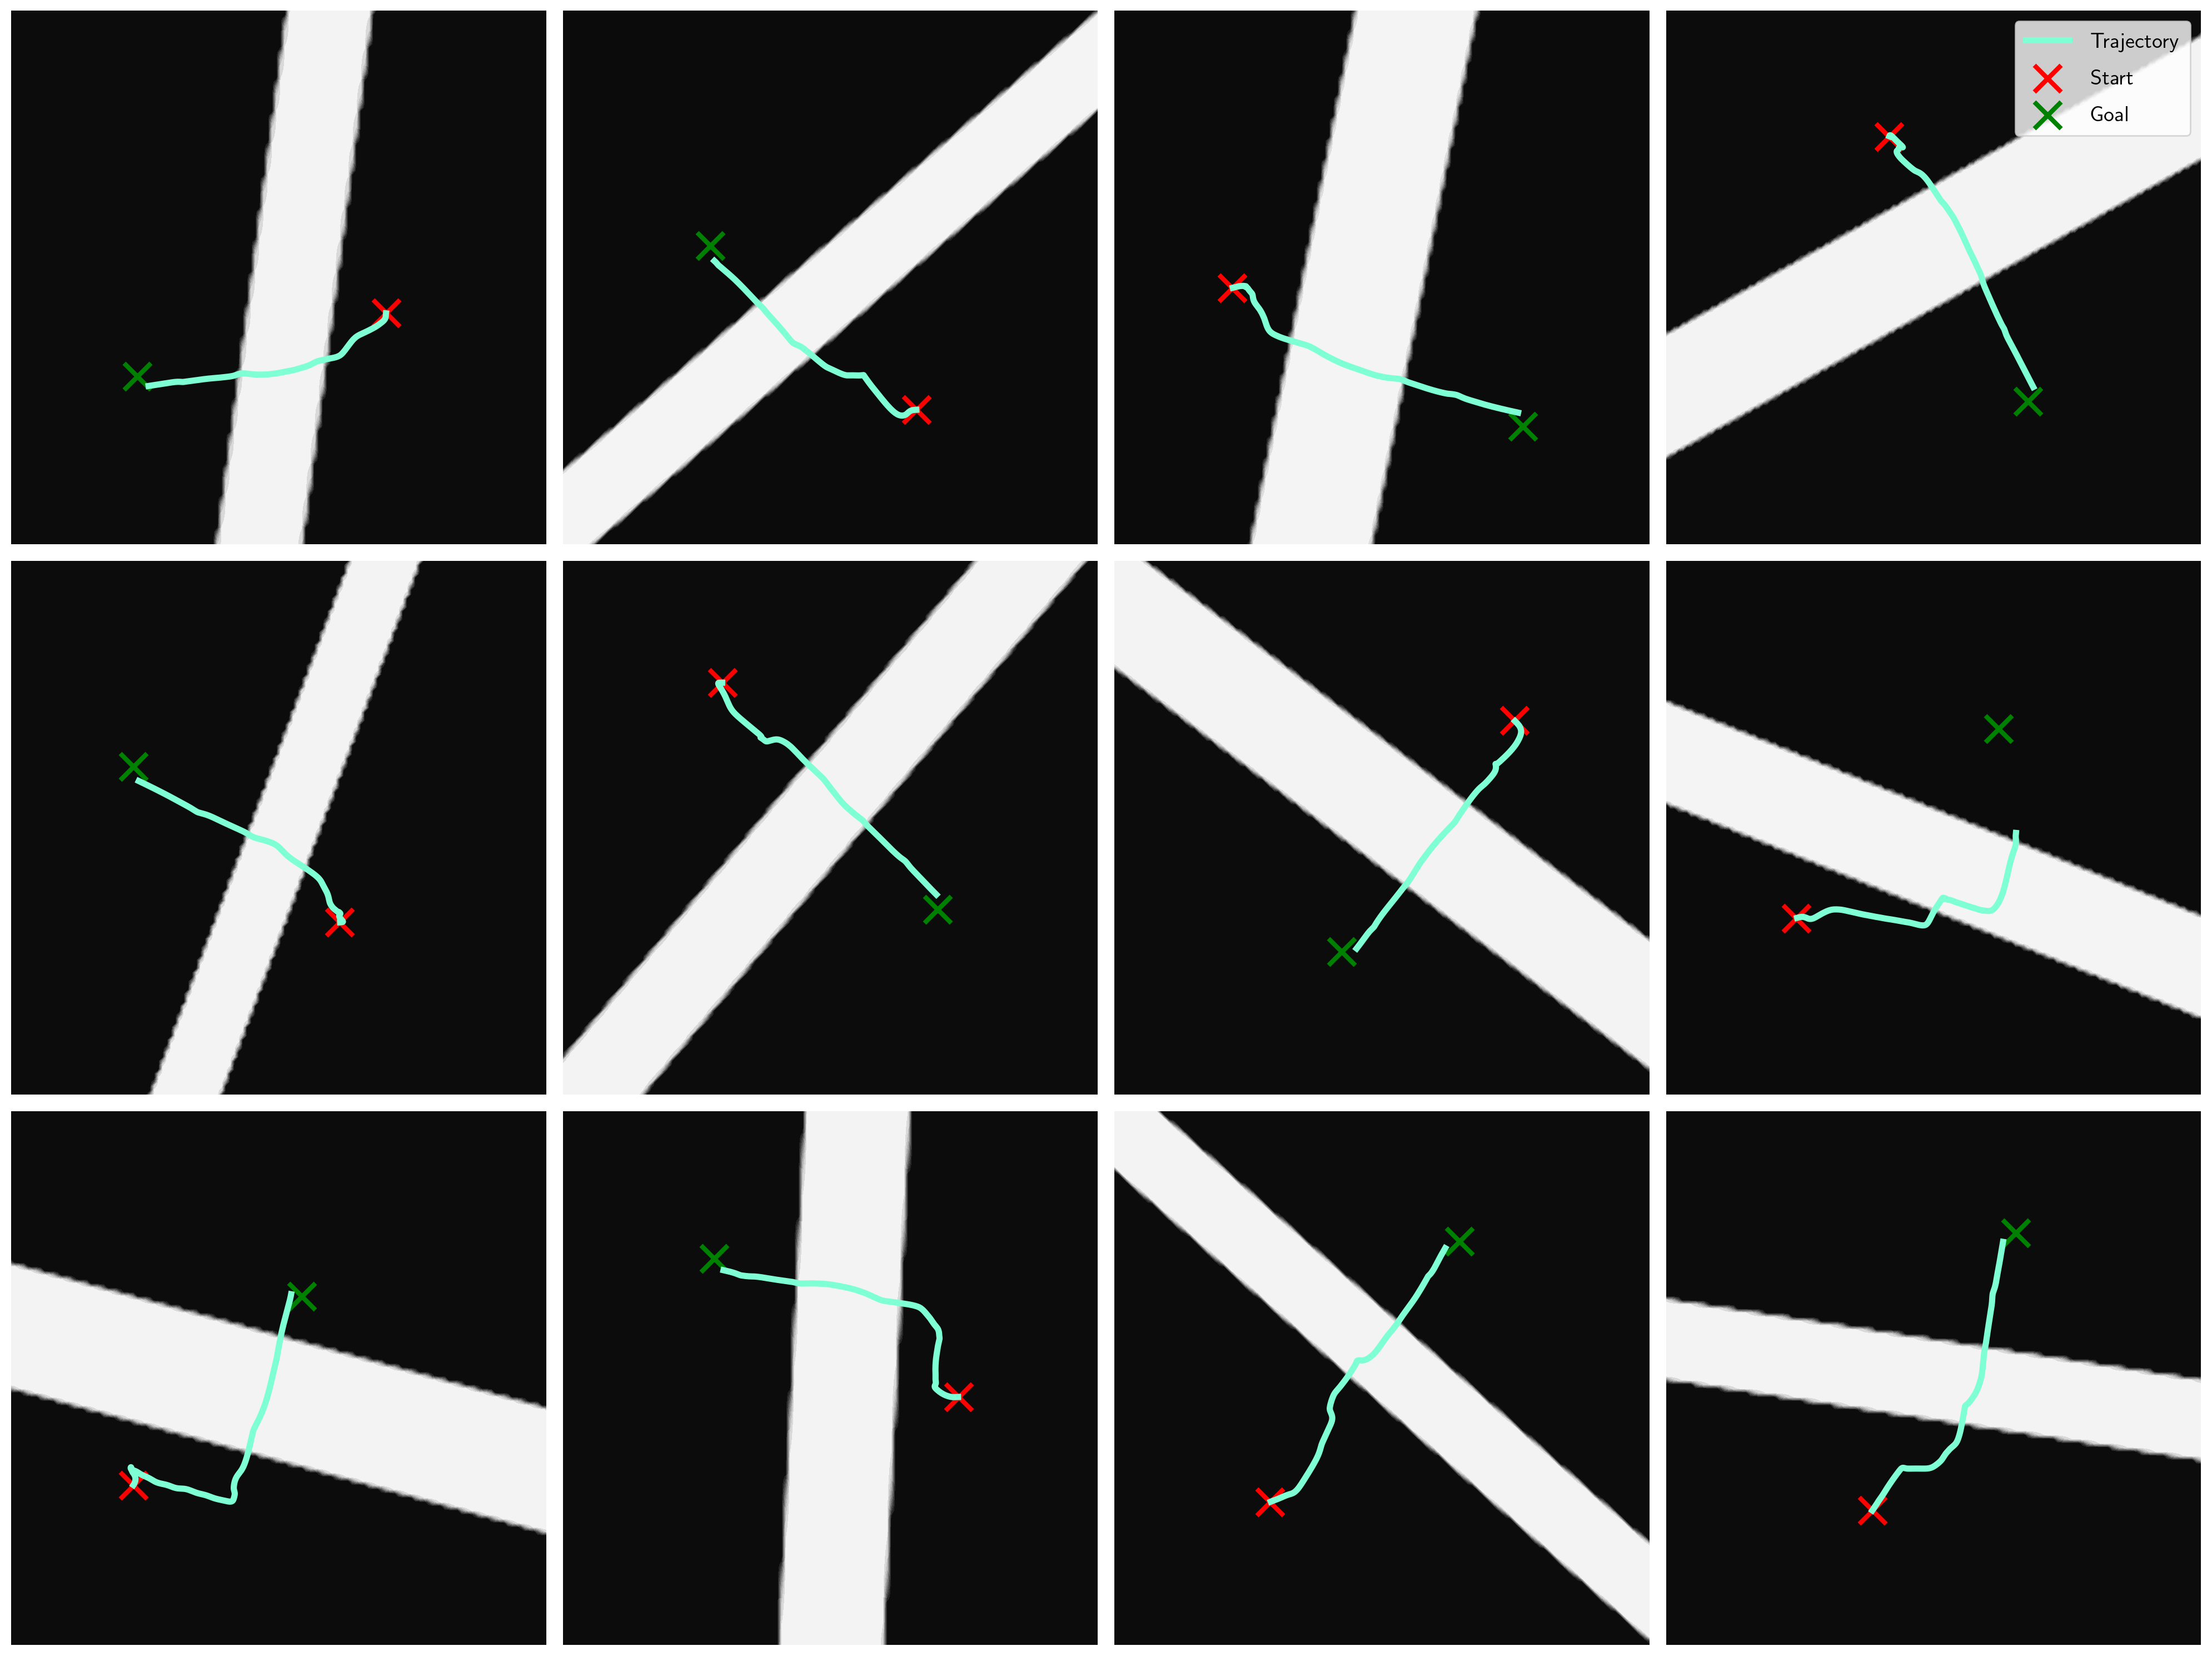

In [64]:
col = 4
row = 3
single_size = 5
indices_to_show = range(-1, -13, -1)
fig, ax = plt.subplots(row, col, figsize=(col * single_size, row * single_size), dpi=200)
if ax.ndim == 1:
    ax = ax.reshape(1, -1)
j = 0
for i in indices_to_show:
    row_idx = j // col
    col_idx = j % col
    j += 1
    start_pos = env.start[i].x
    goal_pos = env.goal[i].x
    ax[row_idx, col_idx].grid(False)
    ax[row_idx, col_idx].axis("off")
    ax[row_idx, col_idx].contourf(
        terrain_cfg.x_grid[i],
        terrain_cfg.y_grid[i],
        z_normalized[i],
        cmap="gray",
        levels=10,
    )
    done_i = rollout["next", "done"][i]
    not_done = ~done_i
    traj_i = trajectories[i, not_done.squeeze(), :2]
    ax[row_idx, col_idx].plot(
        traj_i[:, 0],
        traj_i[:, 1],
        color="aquamarine",
        linewidth=4,
        label="Trajectory",
    )
    ax[row_idx, col_idx].scatter(
        start_pos[None, 0],
        start_pos[None, 1],
        color="red",
        marker="x",
        s=300,
        label="Start",
        lw=3,
    )
    ax[row_idx, col_idx].scatter(
        goal_pos[None, 0],
        goal_pos[None, 1],
        color="green",
        marker="x",
        s=300,
        label="Goal",
        lw=3,
    )
    fig.tight_layout()

ax[0, -1].legend(
    fontsize=14,
    loc="upper right",
    borderpad=0.5,  # padding around the legend
    labelspacing=0.8,  # vertical space between entries
    handletextpad=1.0,  # space between handle and text
)

In [65]:
fig.savefig(figs / "mixed_policy_trunk_hard_success.pdf")